In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from tqdm import tqdm

from concurrent.futures import ProcessPoolExecutor
from scipy.optimize import curve_fit

import cProfile
import pstats


# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag

np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
N = 2500
D = 2

n_range = np.arange(10, N, 20)
greedy_forward_path_weights = []
greedy_backward_path_weights = []

for n in tqdm(n_range):
    DAG = dag.CausalSetGraph()
    R = dag.minkowski_interval(n, D)
    G = DAG.generate_graph(R, weighted=True)
    greedy_forward = DAG.traverse_path(dag.greedy_shortest_path, 'forward')
    greedy_backward = DAG.traverse_path(dag.greedy_shortest_path, 'backward')
    greedy_forward_path_weights.append(DAG.get_path_weight(greedy_forward))
    greedy_backward_path_weights.append(DAG.get_path_weight(greedy_backward[::-1]))

greedy_forward_path_weights = np.asarray(greedy_forward_path_weights)
greedy_backward_path_weights = np.asarray(greedy_backward_path_weights)

100%|██████████| 125/125 [04:04<00:00,  1.96s/it]


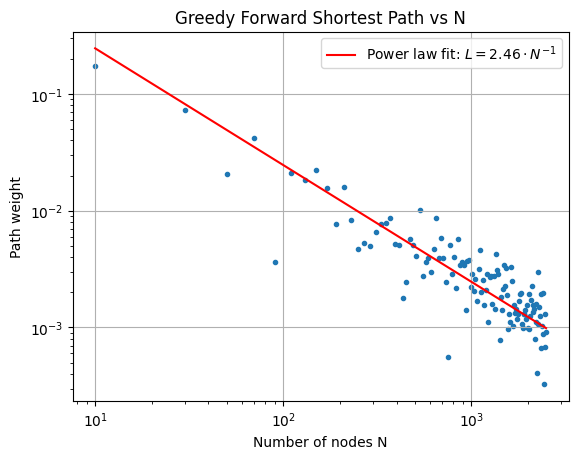

In [4]:
# Define the power law function
power_law = lambda x, a: a - np.log(x)

# Fit the power law function to the data
n_range = n_range.astype('float64')
params, _ = curve_fit(power_law, n_range, np.log(greedy_forward_path_weights))
a_fit = np.exp(params[0])

# Plot the original data and the fitted power law
plt.scatter(n_range, greedy_forward_path_weights, marker='.')
plt.title('Greedy Forward Shortest Path vs N')
plt.xlabel('Number of nodes N')
plt.ylabel('Path weight')
plt.grid(True)
plt.plot(n_range, a_fit*pow(n_range, -1), label='Power law fit: $L=%.2f \cdot N^{-1}$' % a_fit, color='red')
plt.legend()
# Set log-log scale
plt.xscale('log')
plt.yscale('log')
plt.show()


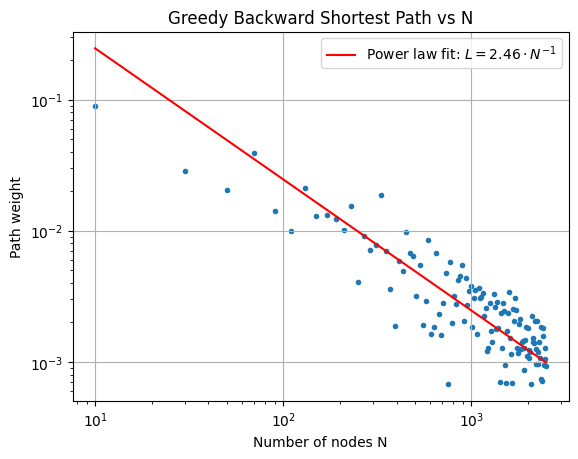

In [5]:
# Define the power law function
power_law = lambda x, a: a - np.log(x)

# Fit the power law function to the data
n_range = n_range.astype('float64')
params, _ = curve_fit(power_law, n_range, np.log(greedy_backward_path_weights))
a_fit = np.exp(params[0])

# Plot the original data and the fitted power law
plt.scatter(n_range, greedy_backward_path_weights, marker='.')
plt.title('Greedy Backward Shortest Path vs N')
plt.xlabel('Number of nodes N')
plt.ylabel('Path weight')
plt.grid(True)
plt.plot(n_range, a_fit*pow(n_range, -1), label='Power law fit: $L=%.2f \cdot N^{-1}$' % a_fit, color='red')
plt.legend()
# Set log-log scale
plt.xscale('log')
plt.yscale('log')
plt.show()